In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\goten\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_US = df[df['job_country']=='United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month

df_US_pivot.sort_values('month_no', inplace=True)
df_US_pivot.set_index('job_posted_month',inplace=True)
df_US_pivot.drop(columns='month_no',inplace=True)

In [4]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv',index_col='job_posted_month')
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [5]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')

In [6]:
top_5 = (
    df_US_merged
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .to_list()
    )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

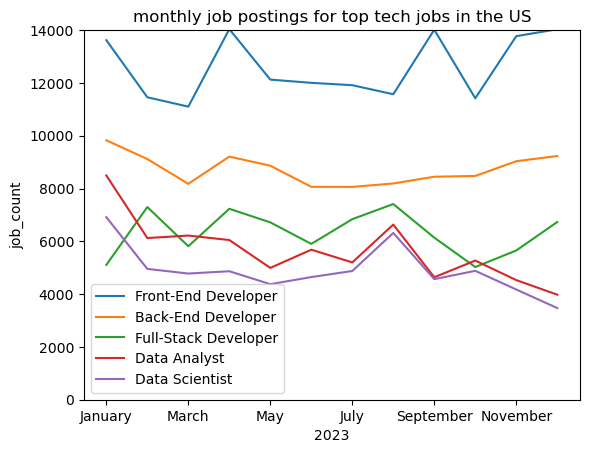

In [7]:
df_US_merged[top_5].plot(kind='line')
plt.title('monthly job postings for top tech jobs in the US')
plt.xlabel('2023')
plt.ylabel('job_count')
plt.ylim(0,14000)
plt.legend()
plt.show()